In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
df0 = pd.read_csv("1.csv")

prices = df0['SalePrice']
df = df0.drop(['SalePrice','Id'], axis = 1)


aa = df.describe()
aa = aa.T
aa

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,56.881426,42.310746,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,57.612748,34.673850,0.0,42.0,63.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.575737,1.113079,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0


In [3]:
#将所有数值型的按四分位处理成离散型（自动）
for index,row in aa.iterrows():
    if row[3]==row[4] or row[4] == row[5] or row[5]==row[6] or row[6] == row[7]:
        print index,row[3],row[4],row[5],row[6],row[7]
    else:
        df[index] = pd.cut(df[index],bins=[row[3],row[4],row[5],row[6],row[7]],include_lowest=True)
    #print index

MSSubClass 20.0 20.0 50.0 70.0 190.0
OverallCond 1.0 5.0 5.0 6.0 9.0
MasVnrArea 0.0 0.0 0.0 164.5 1600.0
BsmtFinSF1 0.0 0.0 384.0 712.5 5644.0
BsmtFinSF2 0.0 0.0 0.0 0.0 1474.0
2ndFlrSF 0.0 0.0 0.0 728.0 2065.0
LowQualFinSF 0.0 0.0 0.0 0.0 572.0
BsmtFullBath 0.0 0.0 0.0 1.0 3.0
BsmtHalfBath 0.0 0.0 0.0 0.0 2.0
FullBath 0.0 1.0 2.0 2.0 3.0
HalfBath 0.0 0.0 0.0 1.0 2.0
BedroomAbvGr 0.0 2.0 3.0 3.0 8.0
KitchenAbvGr 0.0 1.0 1.0 1.0 3.0
Fireplaces 0.0 0.0 1.0 1.0 3.0
GarageCars 0.0 1.0 2.0 2.0 4.0
WoodDeckSF 0.0 0.0 0.0 168.0 857.0
OpenPorchSF 0.0 0.0 25.0 68.0 547.0
EnclosedPorch 0.0 0.0 0.0 0.0 552.0
3SsnPorch 0.0 0.0 0.0 0.0 508.0
ScreenPorch 0.0 0.0 0.0 0.0 480.0
PoolArea 0.0 0.0 0.0 0.0 738.0
MiscVal 0.0 0.0 0.0 0.0 15500.0


In [4]:
#将所有数值型的按四分位处理成离散型（手动处理剩下的）
df['MSSubClass'] = pd.cut(df['MSSubClass'],bins=[20,50,70,190],include_lowest=True) 
df['OverallCond'] = pd.cut(df['OverallCond'],bins=[1,5,6,9],include_lowest=True) #有一些是Nan处理成0，所以多分这一类
df['MasVnrArea'] = pd.cut(df['MasVnrArea'],bins=[0,1,165,1600],include_lowest=True) 
df['BsmtFinSF1'] = pd.cut(df['BsmtFinSF1'],bins=[0,1,384,713,5644],include_lowest=True) 
df['BsmtFinSF2'] = pd.cut(df['BsmtFinSF2'],bins=[0,1,1526],include_lowest=True) 

df['2ndFlrSF'] = pd.cut(df['2ndFlrSF'],bins=[0,1,728,2065],include_lowest=True) 
df['LowQualFinSF'] = pd.cut(df['LowQualFinSF'],bins=[0,1,572,1064],include_lowest=True) 
df['BsmtFullBath'] = pd.cut(df['BsmtFullBath'],bins=[0,1,2,3],include_lowest=True) 
df['BsmtHalfBath'] = pd.cut(df['BsmtHalfBath'],bins=[0,1,2],include_lowest=True) 
df['FullBath'] = pd.cut(df['FullBath'],bins=[0,1,2,4],include_lowest=True) 
df['HalfBath'] = pd.cut(df['HalfBath'],bins=[0,1,2],include_lowest=True) 
df['BedroomAbvGr'] = pd.cut(df['BedroomAbvGr'],bins=[0,1,2,3,8],include_lowest=True) 

df['KitchenAbvGr'] = pd.cut(df['KitchenAbvGr'],bins=[0,1,2,3],include_lowest=True) 
df['Fireplaces'] = pd.cut(df['Fireplaces'],bins=[0,1,2,4],include_lowest=True) 
df['GarageCars'] = pd.cut(df['GarageCars'],bins=[0,1,2,5],include_lowest=True) 
df['WoodDeckSF'] = pd.cut(df['WoodDeckSF'],bins=[0,1,168,1424],include_lowest=True) 
df['OpenPorchSF'] = pd.cut(df['OpenPorchSF'],bins=[0,1,25,68,857],include_lowest=True) 

df['EnclosedPorch'] = pd.cut(df['EnclosedPorch'],bins=[0,1,1012],include_lowest=True) 
df['3SsnPorch'] = pd.cut(df['3SsnPorch'],bins=[0,1,508],include_lowest=True) 
df['ScreenPorch'] = pd.cut(df['ScreenPorch'],bins=[0,1,576],include_lowest=True) 
df['PoolArea'] = pd.cut(df['PoolArea'],bins=[0,1,800],include_lowest=True) 
df['MiscVal'] = pd.cut(df['MiscVal'],bins=[0,3000,7000,12000,17000],include_lowest=True) 


In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,"(50, 70]",RL,"(63, 79]","(7549, 9477]",Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,"[0, 1]","[0, 1]",NoPool,NoFence,NoMisc,"[0, 3000]","[1, 5]","(2007, 2008]",WD,Normal
1,"[20, 50]",RL,"(79, 313]","(9477, 11603]",Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,"[0, 1]","[0, 1]",NoPool,NoFence,NoMisc,"[0, 3000]","[1, 5]","[2006, 2007]",WD,Normal
2,"(50, 70]",RL,"(63, 79]","(9477, 11603]",Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,"[0, 1]","[0, 1]",NoPool,NoFence,NoMisc,"[0, 3000]","(8, 12]","(2007, 2008]",WD,Normal
3,"(50, 70]",RL,"(42, 63]","(9477, 11603]",Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,"[0, 1]","[0, 1]",NoPool,NoFence,NoMisc,"[0, 3000]","[1, 5]","[2006, 2007]",WD,Abnorml
4,"(50, 70]",RL,"(79, 313]","(11603, 215245]",Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,"[0, 1]","[0, 1]",NoPool,NoFence,NoMisc,"[0, 3000]","(8, 12]","(2007, 2008]",WD,Normal


In [6]:
bb = df.isnull()
bb2 = bb.apply(lambda x: x.sum(), axis=0)
bb2[bb2 > 0]

Series([], dtype: int64)

In [7]:
df = pd.get_dummies(df)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 479 entries, MSSubClass_[20, 50] to SaleCondition_Partial
dtypes: float64(479)
memory usage: 5.3 MB


In [9]:
df_train_target = prices.values
df_train_data = df.values
print 'df_train_data shape is ', df_train_data.shape
print 'df_train_target shape is ', df_train_target.shape

df_train_data shape is  (1459, 479)
df_train_target shape is  (1459,)


In [10]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
# 总得切分一下数据咯（训练集和测试集）
cv = cross_validation.ShuffleSplit(len(df_train_data), n_iter=3, test_size=0.2,
    random_state=0)

# 各种模型来一圈

print "岭回归"    
for train, test in cv:    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print "支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)"
for train, test in cv:
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print "随机森林回归/Random Forest(n_estimators = 100)"    
for train, test in cv:    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    


岭回归
train score: 0.931, test score: 0.846

train score: 0.923, test score: 0.895

train score: 0.929, test score: 0.844

支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)
train score: -0.048, test score: -0.031

train score: -0.045, test score: -0.041

train score: -0.046, test score: -0.038

随机森林回归/Random Forest(n_estimators = 100)
train score: 0.978, test score: 0.837

train score: 0.974, test score: 0.891

train score: 0.975, test score: 0.850



In [14]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,500],'max_depth':np.arange(11,20)}]   
    
scores = ['r2']

for score in scores:
    
    print score
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("别！喝！咖！啡！了！最佳参数找到了亲！！：")
    print ""
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print ""
    print("得分分别是:")
    print ""
    #grid_scores_的返回值:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print ""



r2
别！喝！咖！啡！了！最佳参数找到了亲！！：

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

得分分别是:

0.802 (+/-0.014) for {'n_estimators': 10, 'max_depth': 11}
0.821 (+/-0.021) for {'n_estimators': 100, 'max_depth': 11}
0.824 (+/-0.022) for {'n_estimators': 500, 'max_depth': 11}
0.786 (+/-0.022) for {'n_estimators': 10, 'max_depth': 12}
0.825 (+/-0.020) for {'n_estimators': 100, 'max_depth': 12}
0.823 (+/-0.022) for {'n_estimators': 500, 'max_depth': 12}
0.797 (+/-0.025) for {'n_estimators': 10, 'max_depth': 13}
0.829 (+/-0.018) for {'n_estimators': 100, 'max_depth': 13}
0.822 (+/-0.021) for {'n_estimators': 500, 'max_depth': 13}
0.801 (+/-0.018) for {'n_estimators': 10, 'max_depth': 14}
0.815 (+/-0.025) for {'n_estimators': 100, 'max_de

/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/mahui/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = o

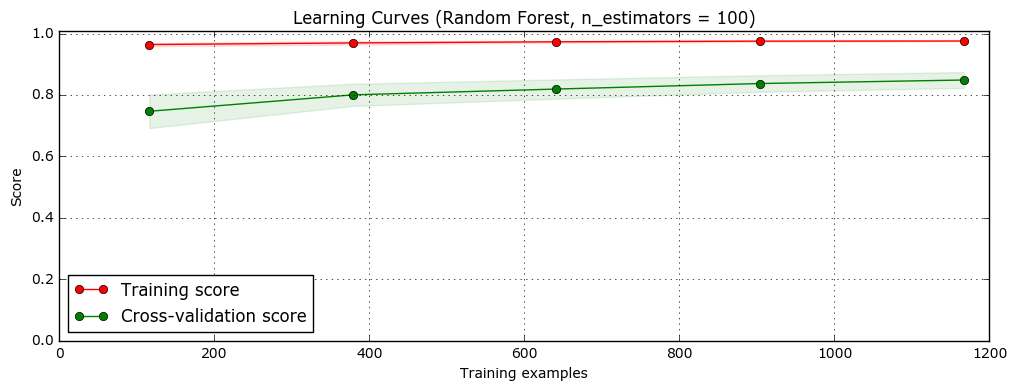

In [16]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [18]:
clf = RandomForestRegressor(n_estimators = 100,max_depth = 13)
clf = clf.fit(X, y)
#

In [25]:
ds = pd.read_csv("test_final.csv")
jieguo  =clf.predict(ds)


AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [35]:
df0 = pd.read_csv("2.csv")
jj = pd.DataFrame({'Id':df0['Id'],'SalePrice':jieguo})
jj.to_csv('aaa.csv',index=False)

#test_results = pd.read_csv('test_results.csv')
def modelfit(alg, dtrain, dtest, price,predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values)
        xgtest = xgb.DMatrix(dtest.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #建模
    alg.fit(dtrain, price,eval_metric='auc')
        
    #对训练集预测
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #输出模型的一些结果
    print "\n关于现在这个模型"
    print "准确率 : %.4g" % metrics.accuracy_score(price.values, dtrain_predictions)
    print "AUC 得分 (训练集): %f" % metrics.roc_auc_score(price, dtrain_predprob)
                
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, prices, test_size=0.2, random_state=7)

xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'reg:linear',
        nthread=4,
        #scale_pos_weight=1,
        seed=27)


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, prices, test_size=0.2, random_state=7)

xgb2 = XGBClassifier(objective= 'reg:linear' , seed=27)

svc = xgb2.fit(X_train, y_train,eval_metric='auc') 
       
    #对训练集预测
dtrain_predictions = svc.predict(X_train)
dtrain_predprob = svc.predict_proba(X_train)[:,1]
        
    #输出模型的一些结果
print "\n关于现在这个模型"
print "准确率 : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions)
print "AUC 得分 (训练集): %f" % metrics.roc_auc_score(y_train, dtrain_predprob)
                
feat_imp = pd.Series(svc.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [15]:
df.to_csv('train_dummi.csv',index=None)